In [23]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from datetime import datetime
from scipy import stats
import os


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product

In [2]:
df = pd.read_csv('/anvil/projects/tdm/corporate/inogen-oxy/data/NUMERIC_ID_USABLE_G5_EUField.csv')


In [3]:
print(len(df))

3268097


In [4]:
grouped = df.groupby('unit')

# Create a list to store the individual DataFrames
individual_datasets = []

# Iterate through the groups and create separate DataFrames
for group_name, group_data in grouped:
    individual_datasets.append(group_data)


In [6]:
len(individual_datasets)

845

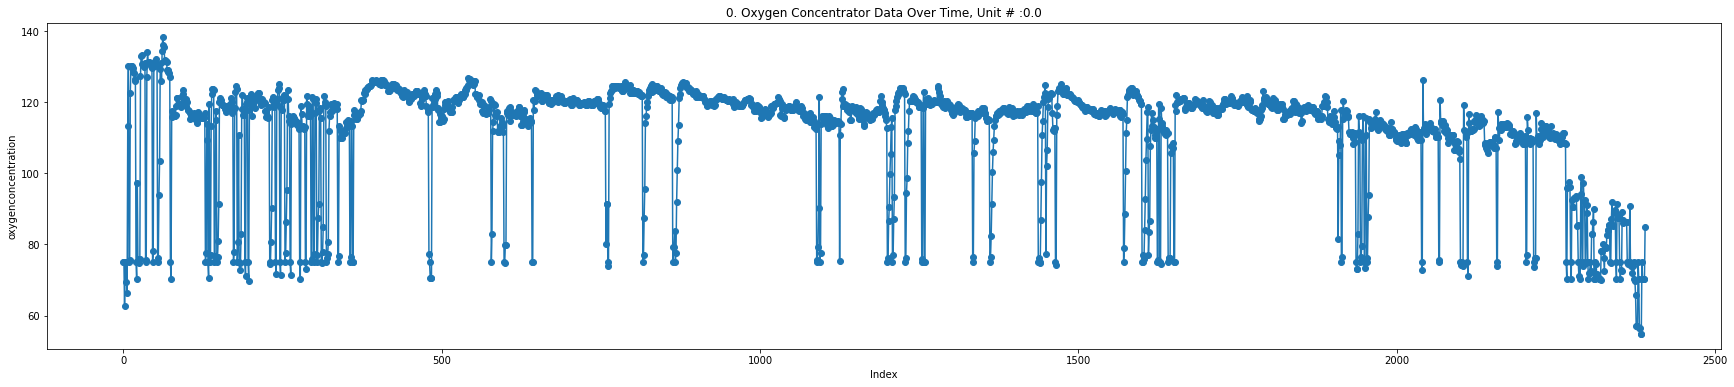

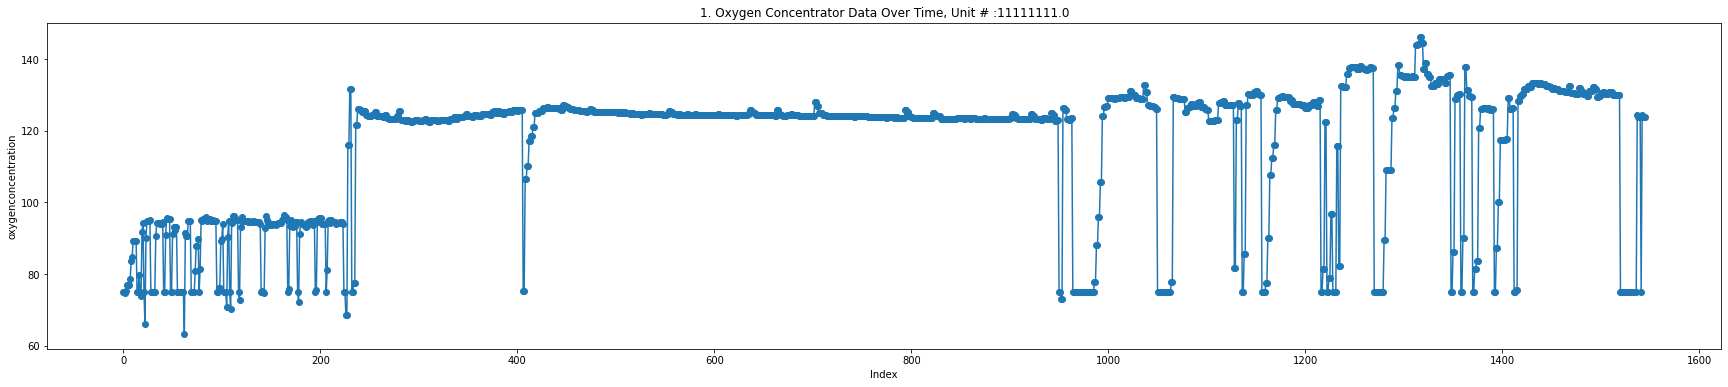

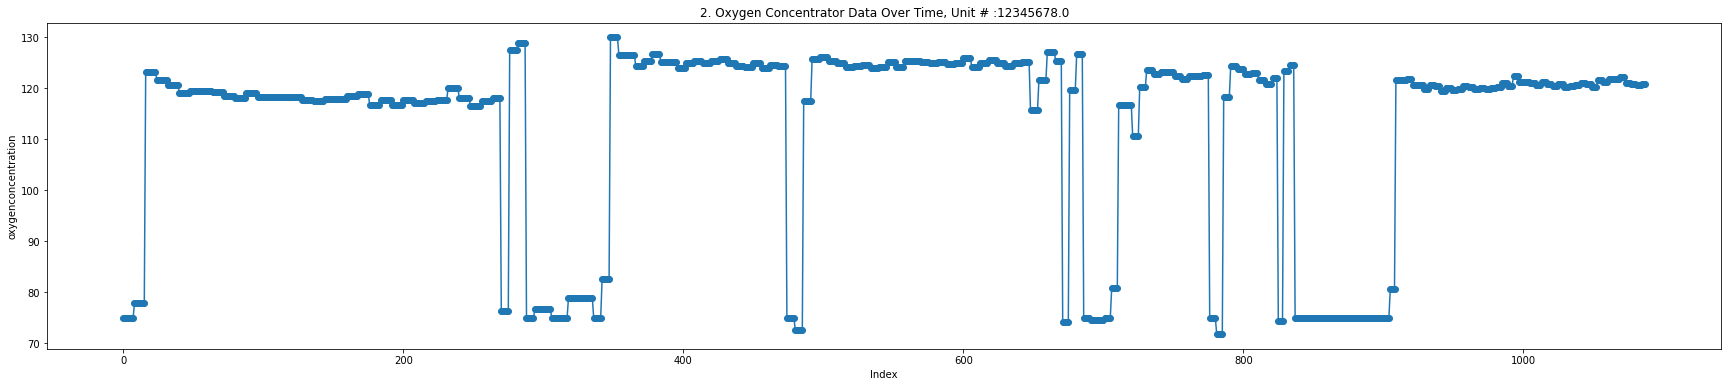

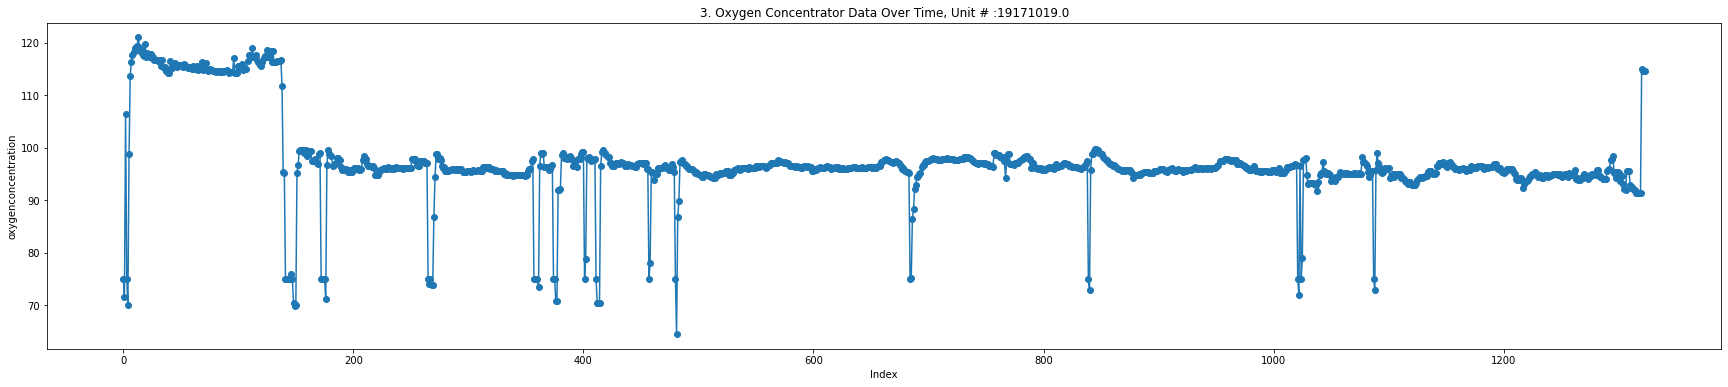

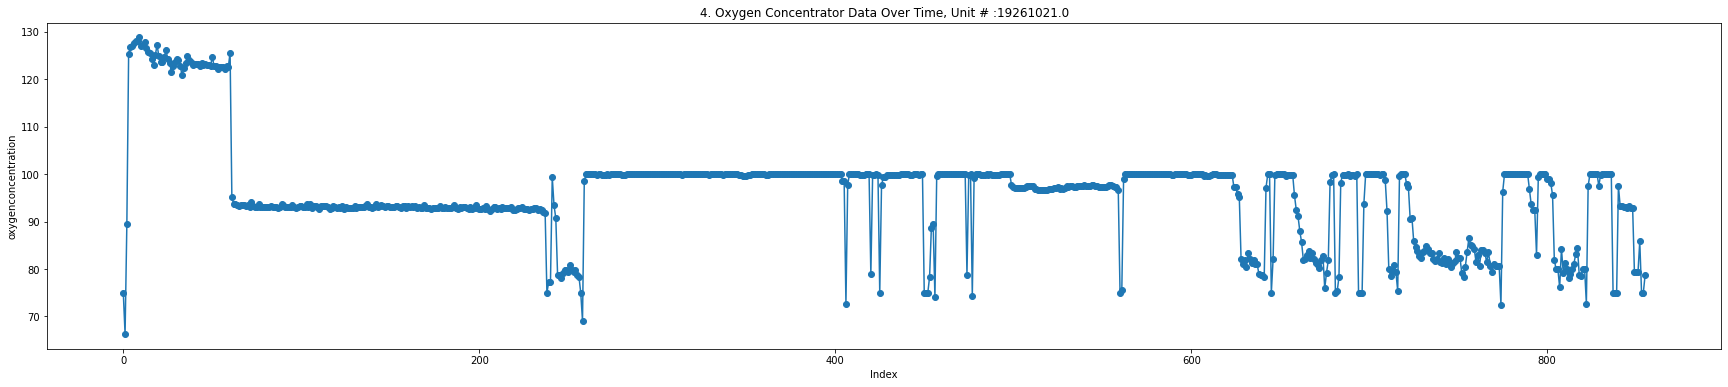

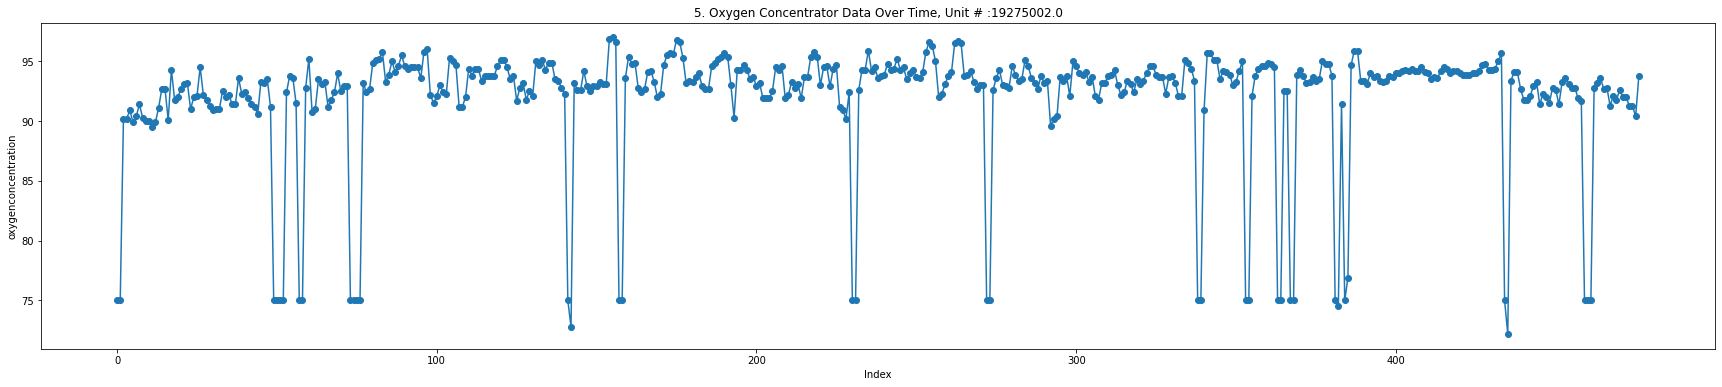

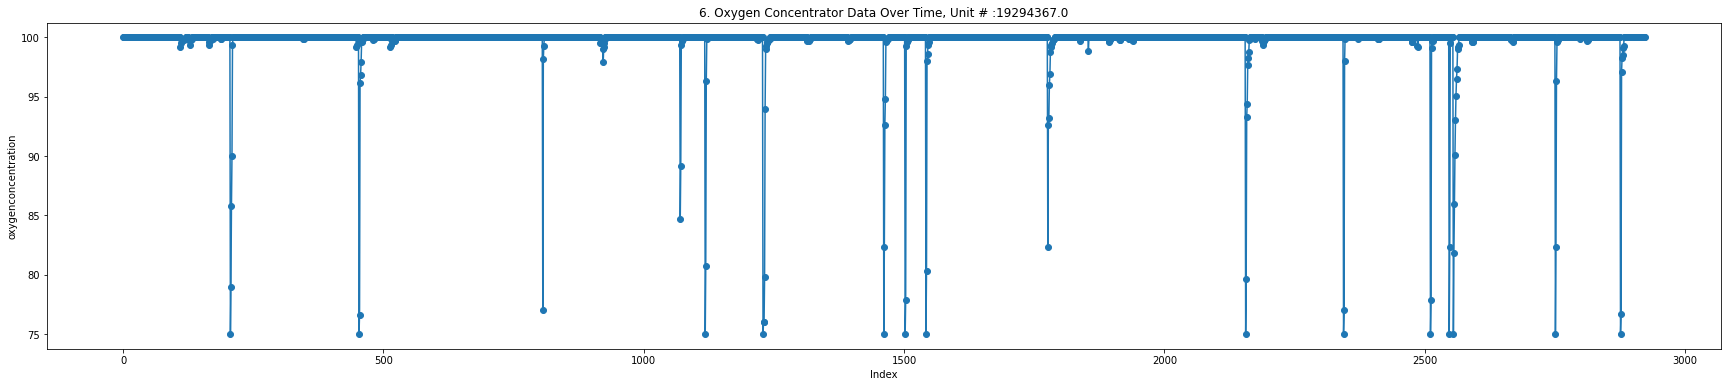

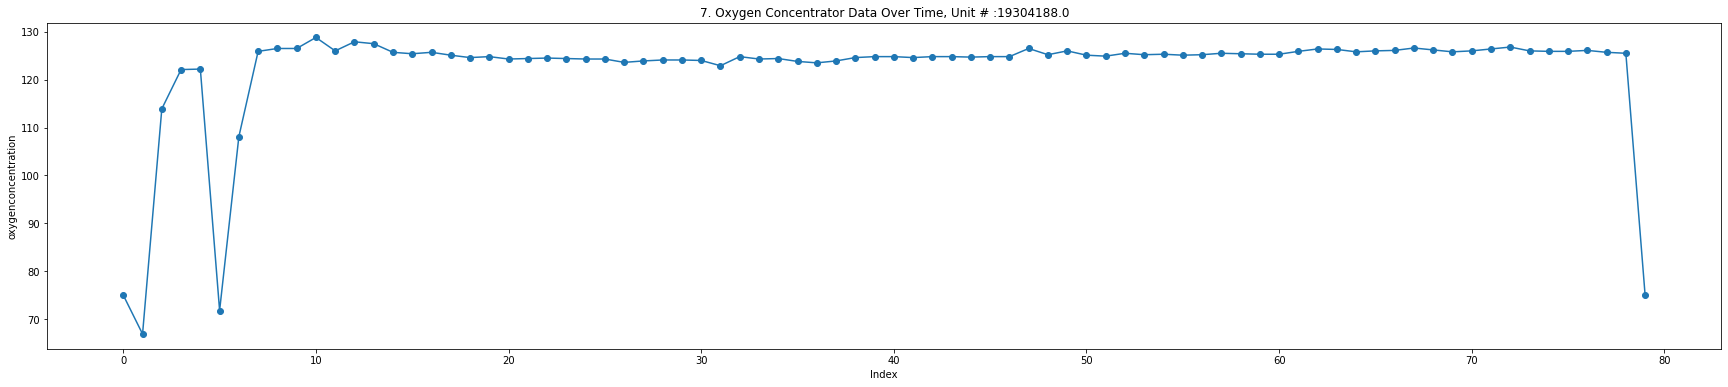

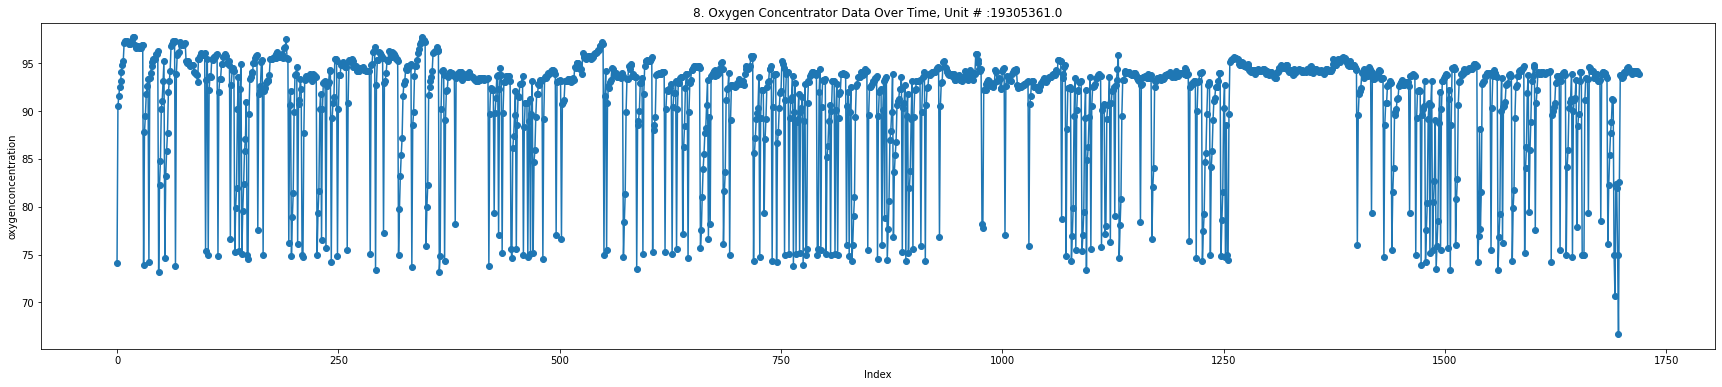

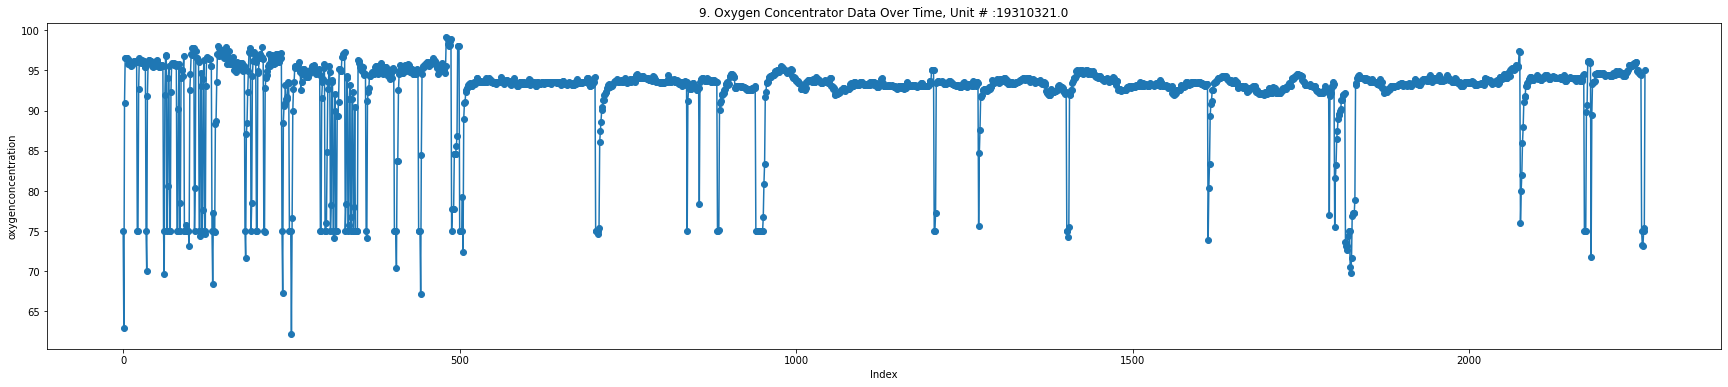

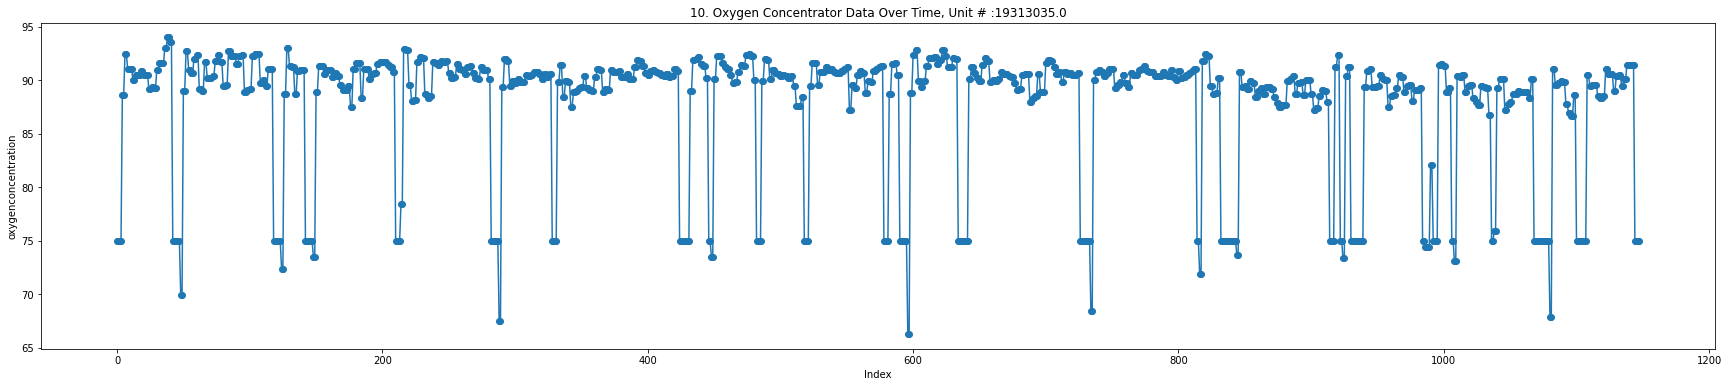

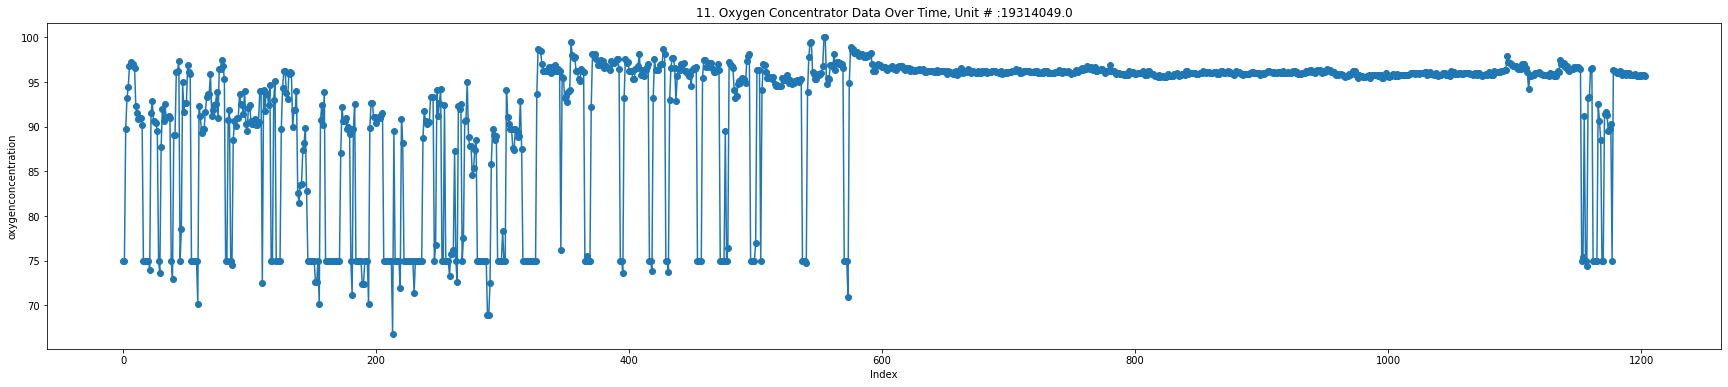

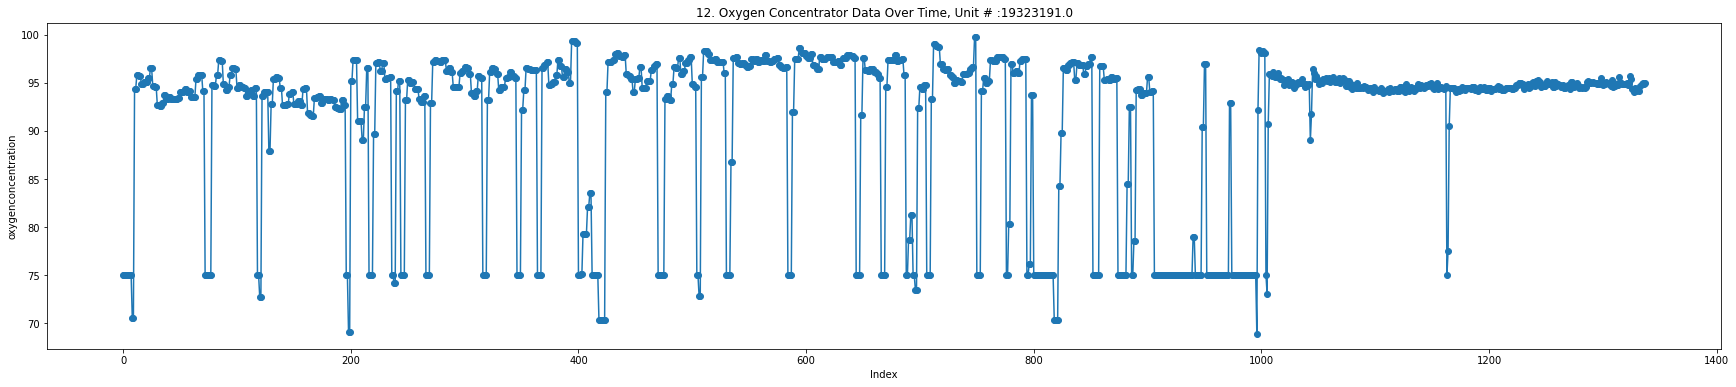

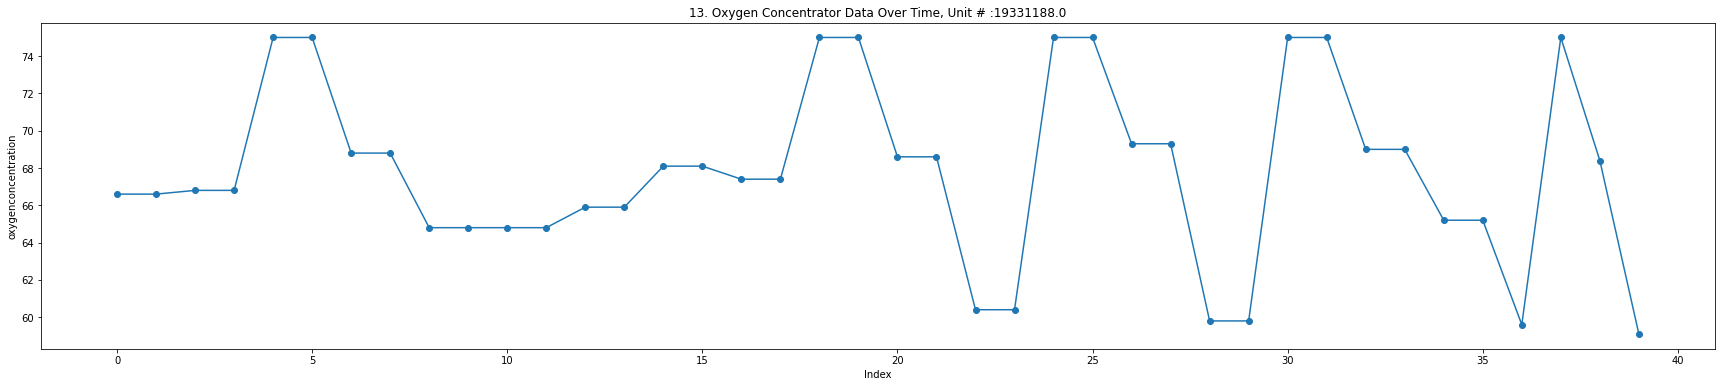

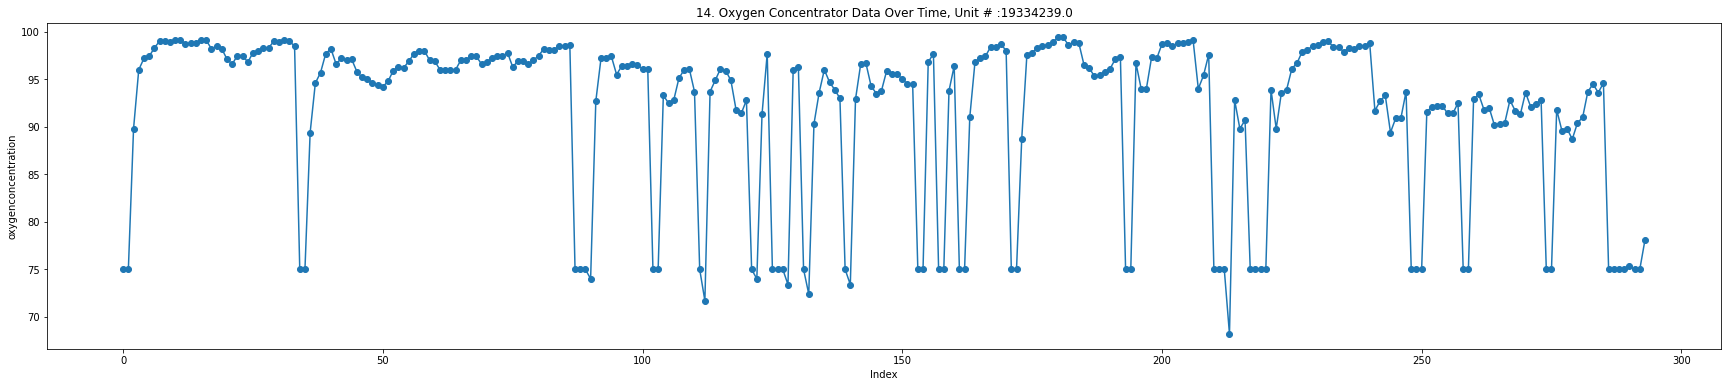

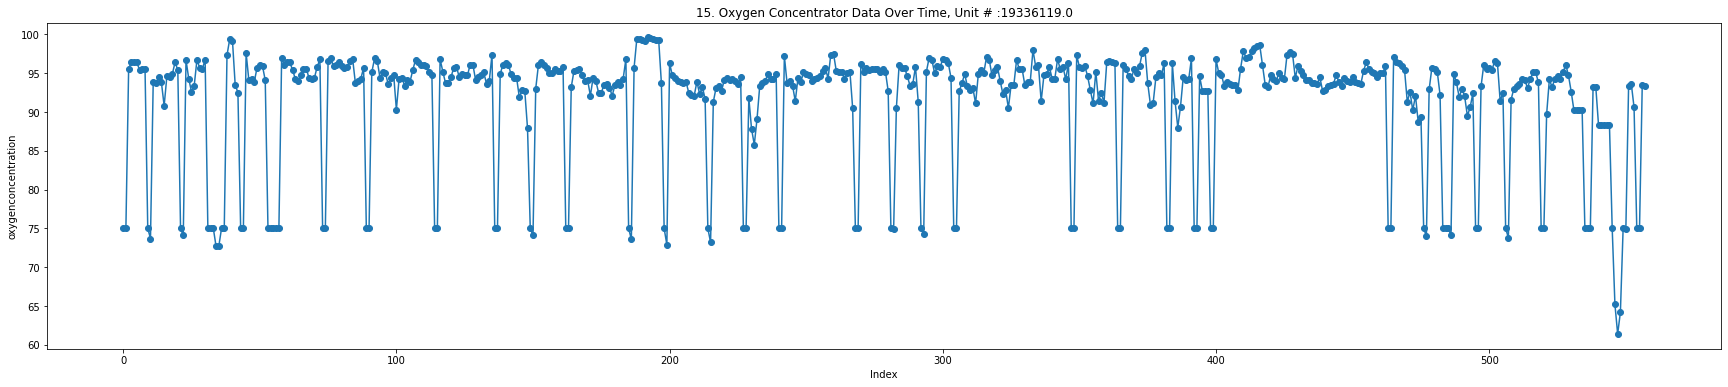

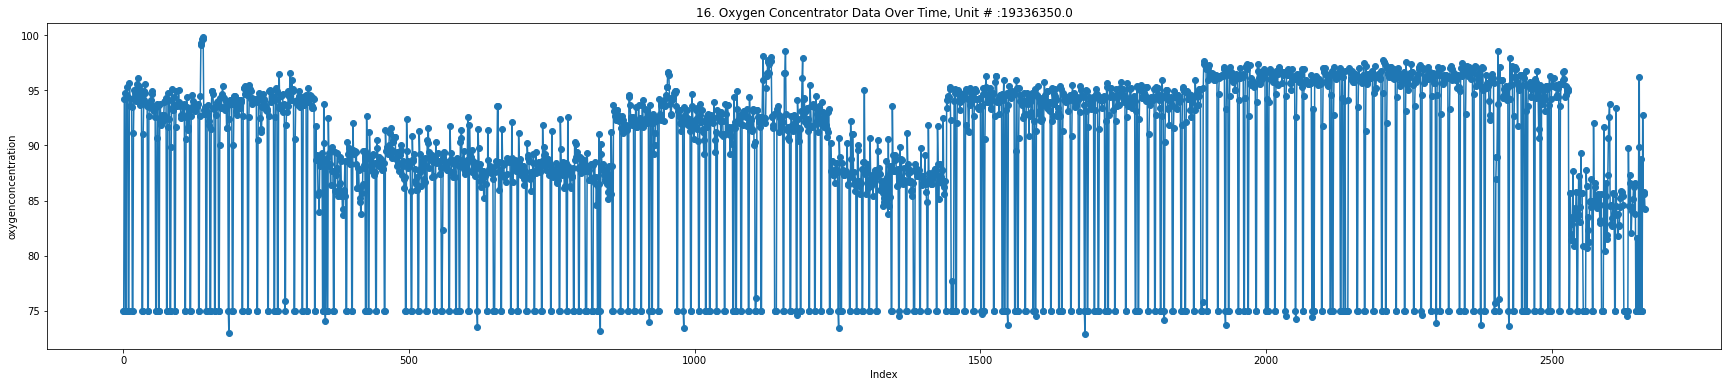

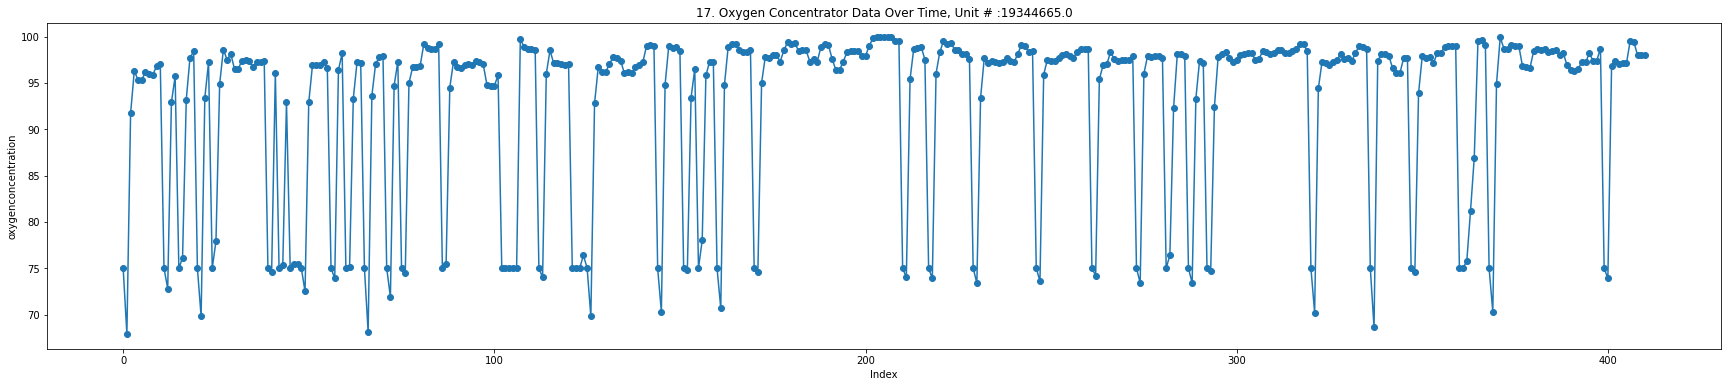

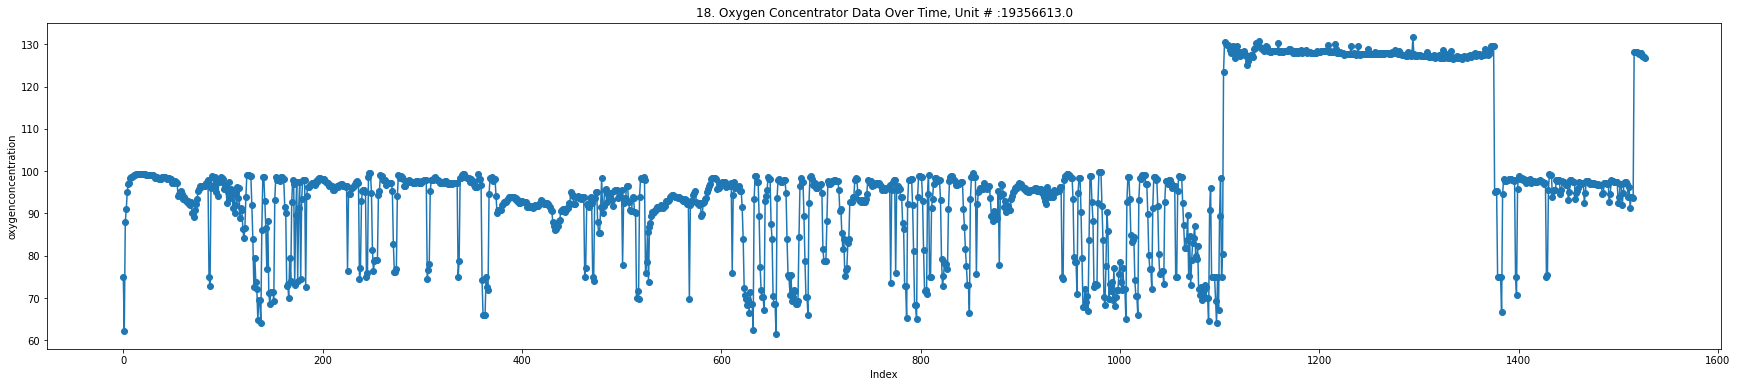

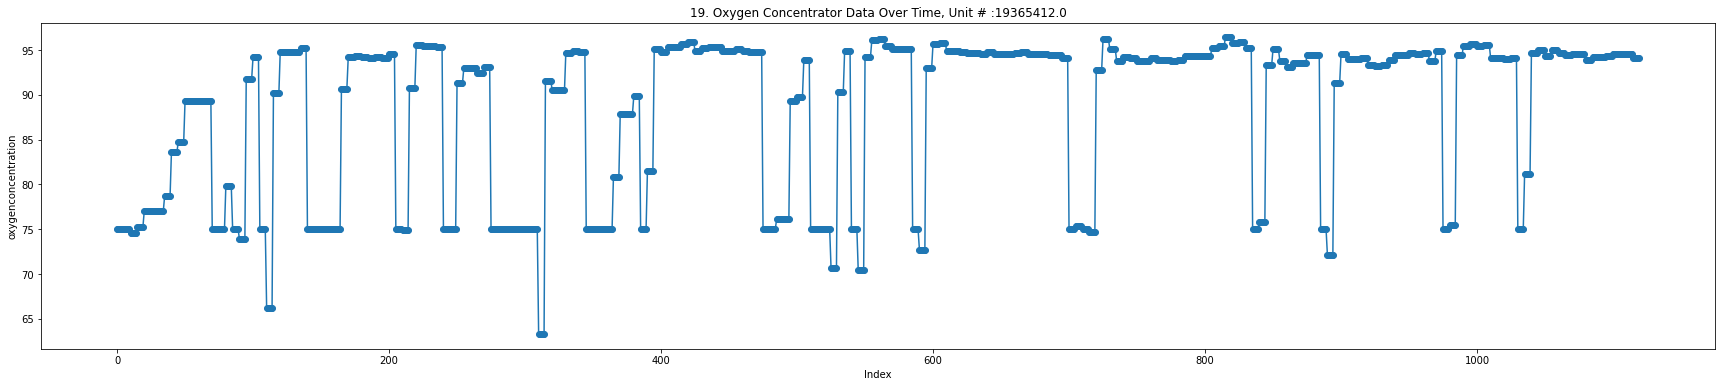

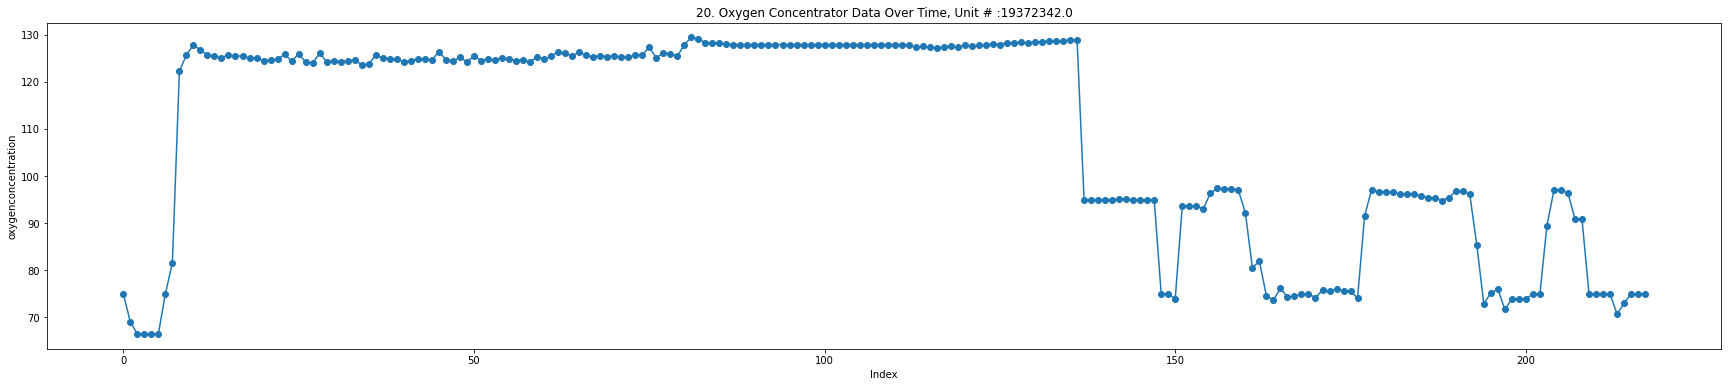

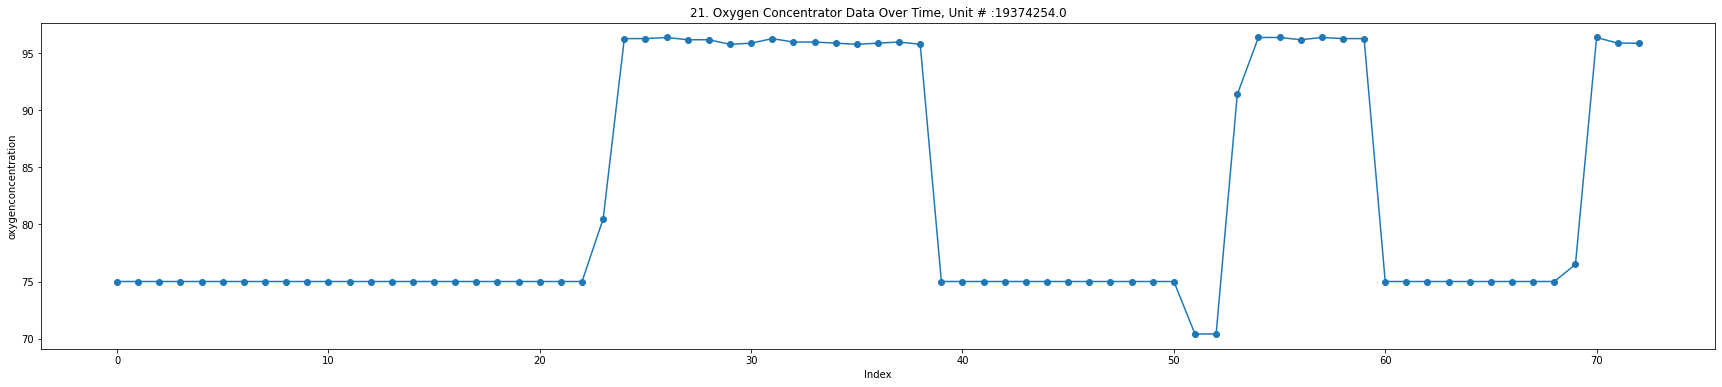

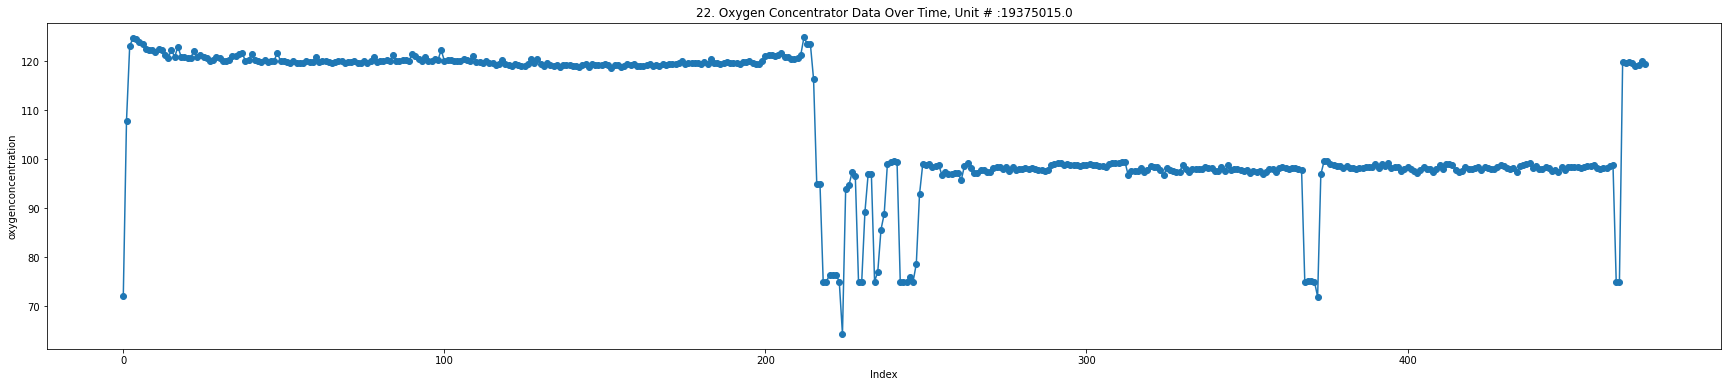

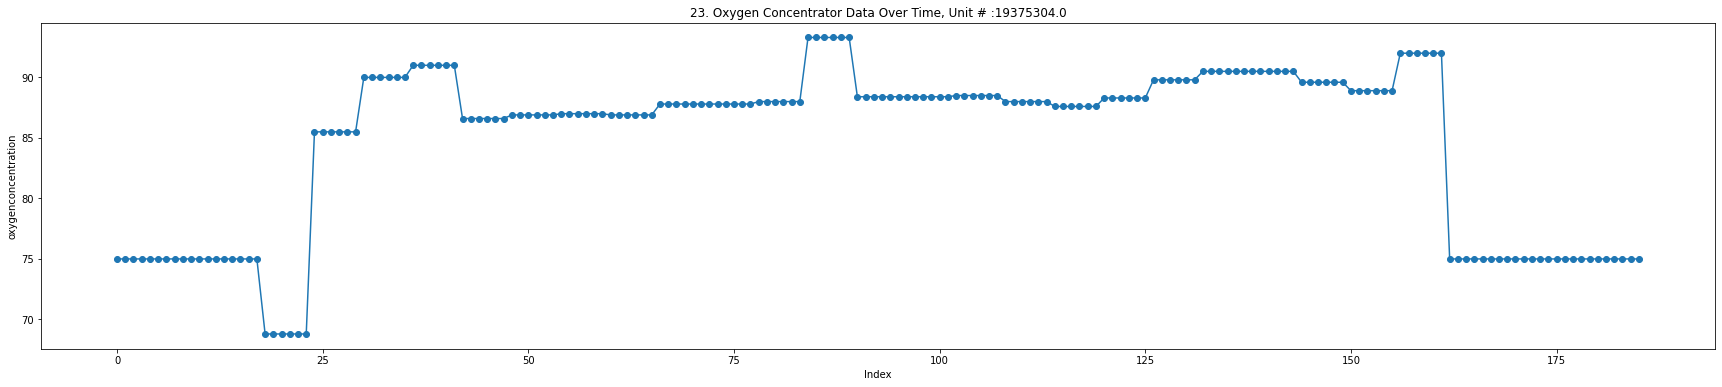

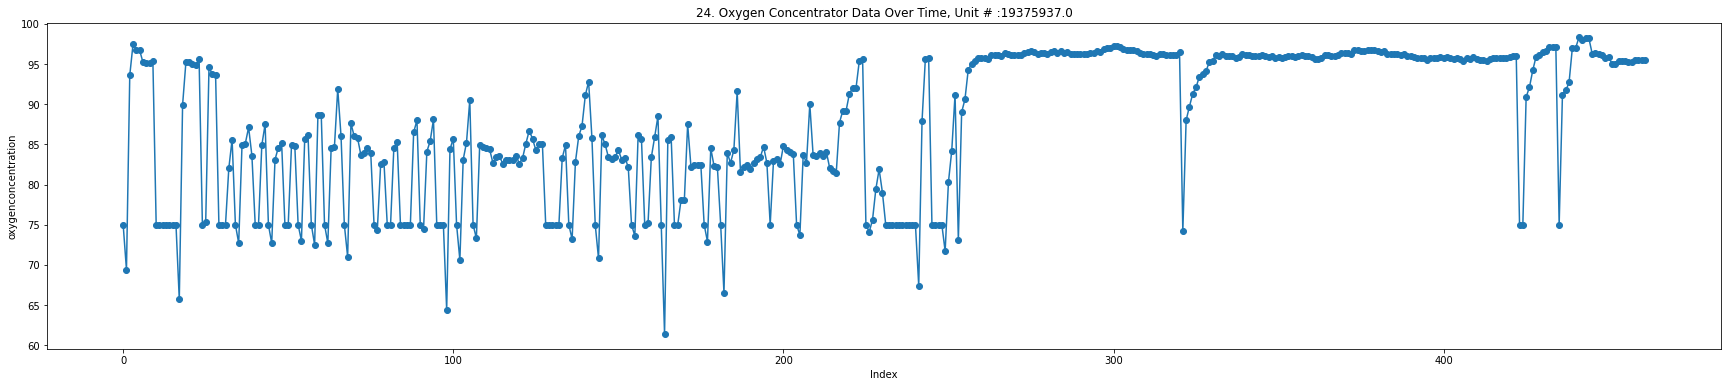

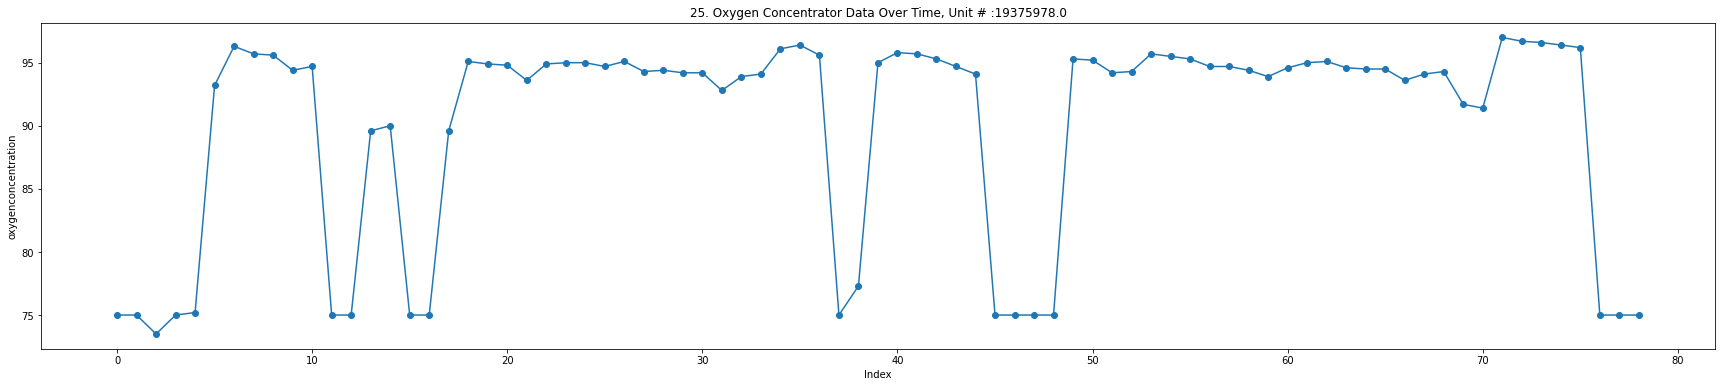

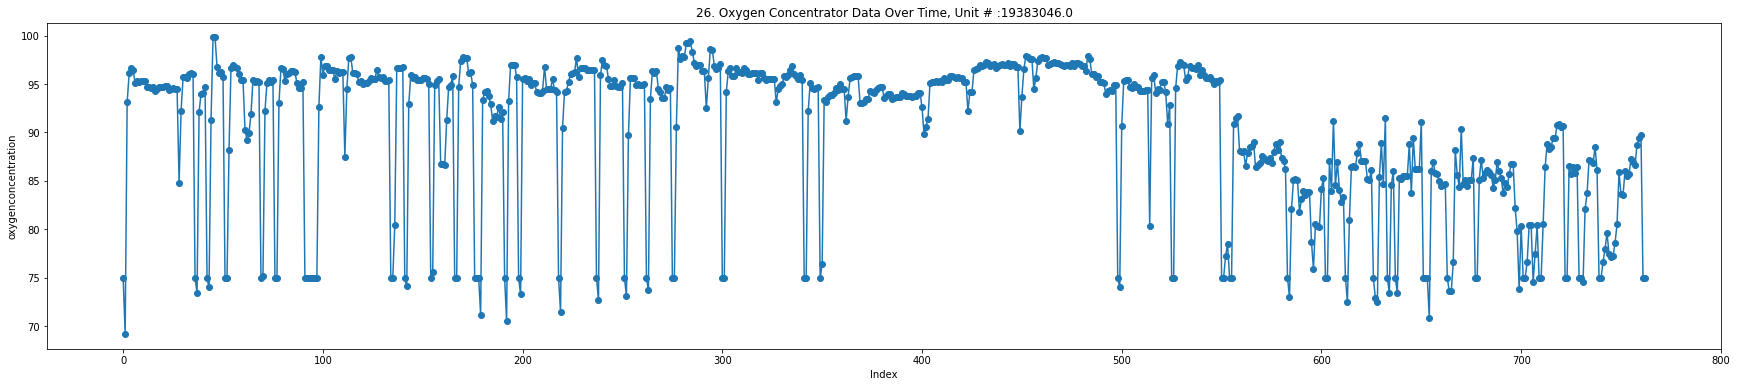

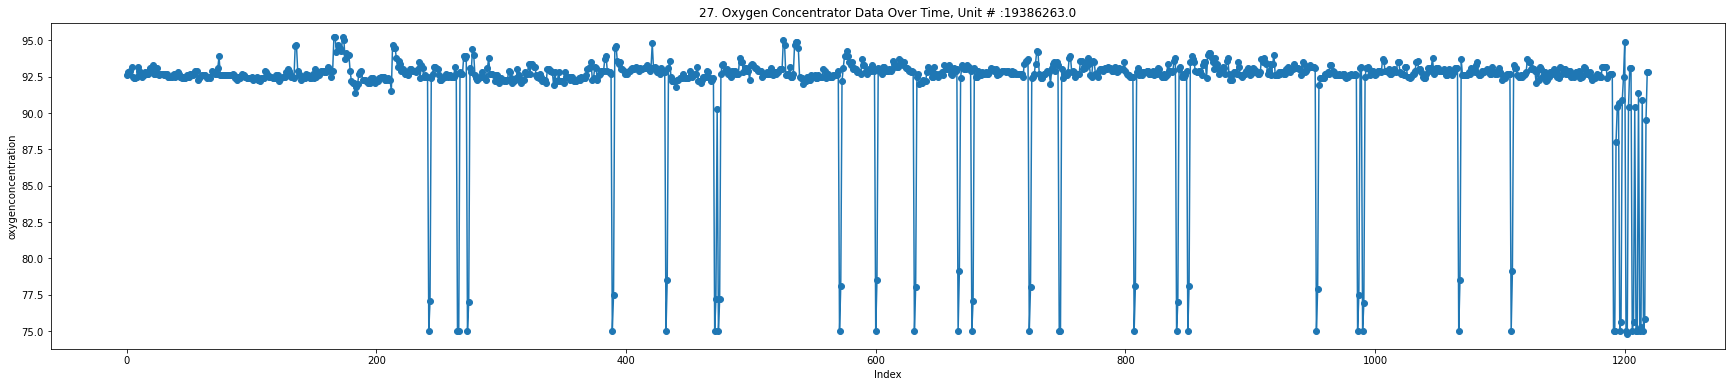

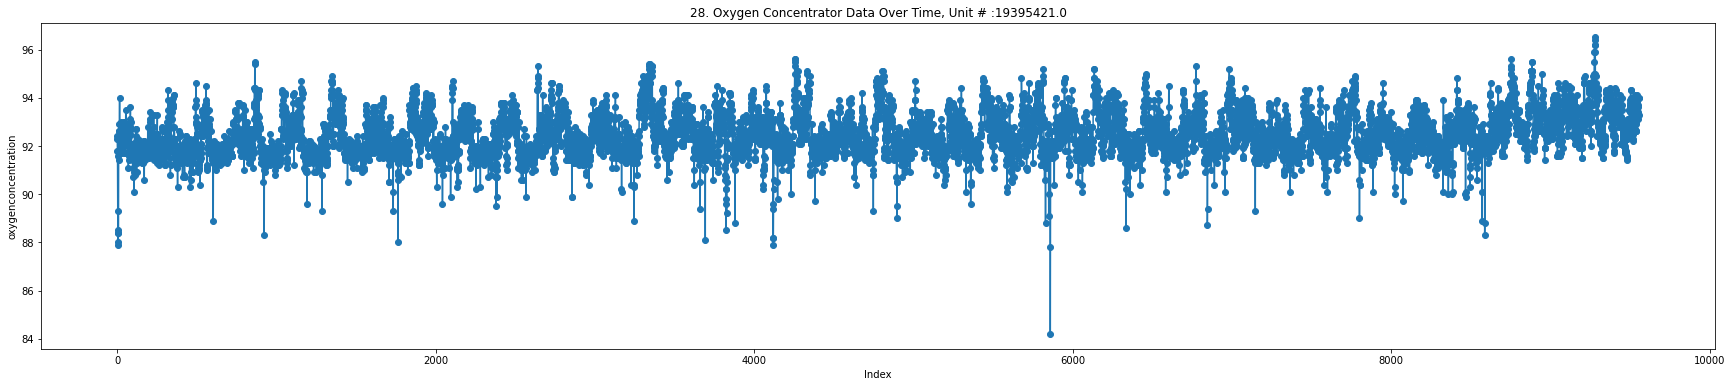

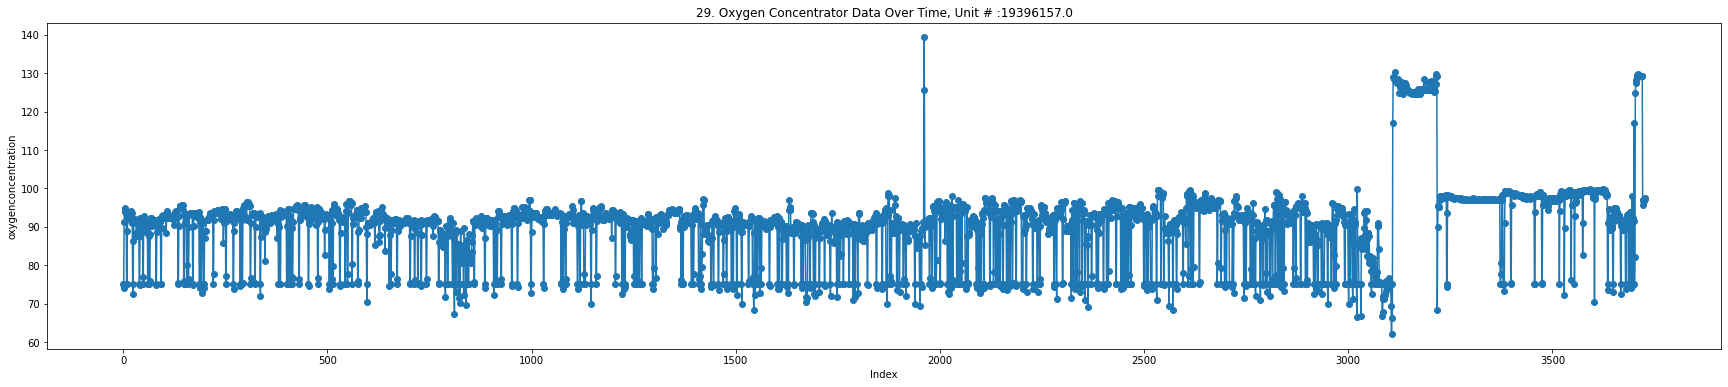

In [8]:
for i in range(0, 30):
    data = individual_datasets[i]

    data['rtc'] = pd.to_datetime(data['rtc'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
    data['rtc'] = data['rtc'].fillna(data['rtc'].apply(lambda x: x.replace(hour=0, minute=0, second=0)))

    data.sort_values(by='rtc', inplace=True)
    data.reset_index(drop=True, inplace=True)


    # Create the plot
    plt.figure(figsize=(30, 6))  # Adjust the figure size as needed
    plt.plot(data.index, data['oxygenconcentration'], marker='o')
    plt.xlabel('Index')
    plt.ylabel('oxygenconcentration')
    plt.title(str(i) + '. Oxygen Concentrator Data Over Time, Unit # :' + str(data['unit'].values[0]))

    plt.show()


In [30]:
print(dataset)

      Unnamed: 0.1  Unnamed: 0       id  lifeclock                 rtc  \
0            86600      891818  1181782      17294 2020-05-01 01:07:30   
1            86601      891819  1181783      17295 2020-05-01 01:09:09   
2            86602      891820  1181784      17295 2020-05-01 01:09:20   
3            86603      891821  1181785      17310 2020-05-01 01:23:31   
4            86604      891822  1181786      17325 2020-05-01 01:38:32   
...            ...         ...      ...        ...                 ...   
1215         87718      892936  1182900      23598                 NaT   
1216         87719      892937  1182901      23598                 NaT   
1217         87720      892938  1182902      23600                 NaT   
1218         87721      892939  1182903      23614                 NaT   
1219         87722      892940  1182904      23615                 NaT   

      systemstate  flowsetting  breathspreminute  errorshigh  errorsmed  ...  \
0               3            1 

In [41]:
numeric_id = "NUMERIC_ID"
folder_name = f"{numeric_id}_USABLE_G5_EUField_Folder"

# Create the folder
if not os.path.exists(folder_name):
    os.mkdir(folder_name)

# Assuming you have an array of datasets called individual_datasets
for i, data in enumerate(individual_datasets):
    # Save each dataset with its index as the filename
    unit = data["unit"].values[0]
    filename = os.path.join(folder_name, f"dataset_{unit}.csv")
    data.to_csv(filename, index=False)

print(f"Datasets saved in folder: {folder_name}")


Datasets saved in folder: NUMERIC_ID_USABLE_G5_EUField_Folder


In [9]:
dataset = individual_datasets[27]
dataset.reset_index(drop=True, inplace=True)
print(dataset)

      Unnamed: 0.1  Unnamed: 0       id  lifeclock                 rtc  \
0            86600      891818  1181782      17294 2020-05-01 01:07:30   
1            86601      891819  1181783      17295 2020-05-01 01:09:09   
2            86602      891820  1181784      17295 2020-05-01 01:09:20   
3            86603      891821  1181785      17310 2020-05-01 01:23:31   
4            86604      891822  1181786      17325 2020-05-01 01:38:32   
...            ...         ...      ...        ...                 ...   
1215         87718      892936  1182900      23598                 NaT   
1216         87719      892937  1182901      23598                 NaT   
1217         87720      892938  1182902      23600                 NaT   
1218         87721      892939  1182903      23614                 NaT   
1219         87722      892940  1182904      23615                 NaT   

      systemstate  flowsetting  breathspreminute  errorshigh  errorsmed  ...  \
0               3            1 

In [9]:
dataset = individual_datasets[27]
dataset.reset_index(drop=True, inplace=True)
print(dataset)

      Unnamed: 0.1  Unnamed: 0       id  lifeclock                 rtc  \
0            86600      891818  1181782      17294 2020-05-01 01:07:30   
1            86601      891819  1181783      17295 2020-05-01 01:09:09   
2            86602      891820  1181784      17295 2020-05-01 01:09:20   
3            86603      891821  1181785      17310 2020-05-01 01:23:31   
4            86604      891822  1181786      17325 2020-05-01 01:38:32   
...            ...         ...      ...        ...                 ...   
1215         87718      892936  1182900      23598                 NaT   
1216         87719      892937  1182901      23598                 NaT   
1217         87720      892938  1182902      23600                 NaT   
1218         87721      892939  1182903      23614                 NaT   
1219         87722      892940  1182904      23615                 NaT   

      systemstate  flowsetting  breathspreminute  errorshigh  errorsmed  ...  \
0               3            1 

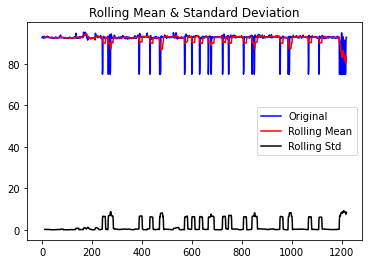

Results of Dickey Fuller Test:
Test Statistic                -7.910548e+00
p-value                        3.958784e-12
#Lags Used                     8.000000e+00
Number of Observations Used    1.211000e+03
Critical Value (1%)           -3.435761e+00
Critical Value (5%)           -2.863930e+00
Critical Value (10%)          -2.568042e+00
dtype: float64


In [19]:
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    movingAverage = timeseries['oxygenconcentration'].rolling(window=12).mean()
    movingSTD = timeseries['oxygenconcentration'].rolling(window=12).std()
    
    # Plot rolling statistics
    plt.plot(timeseries.index, timeseries['oxygenconcentration'], color='blue', label='Original')
    plt.plot(timeseries.index, movingAverage, color='red', label='Rolling Mean')
    plt.plot(timeseries.index, movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    airpass_test = adfuller(timeseries['oxygenconcentration'], autolag='AIC')
    dfoutput = pd.Series(airpass_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in airpass_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Replace 'dataset' with your actual time series data
test_stationarity(dataset)


Optimal Order (p, d, q): (0, 0, 0)
                                SARIMAX Results                                
Dep. Variable:     oxygenconcentration   No. Observations:                 1220
Model:                           ARIMA   Log Likelihood               -3303.244
Date:                 Fri, 27 Oct 2023   AIC                           6610.488
Time:                         12:29:07   BIC                           6620.701
Sample:                              0   HQIC                          6614.332
                                - 1220                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.0185      0.575    160.068      0.000      90.892      93.145
sigma2        13.1608      0.988     13.317      0.000      11.224      15.098
Ljung-Box

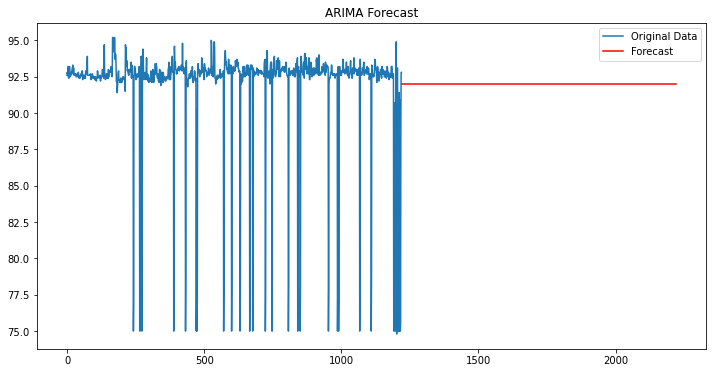

In [27]:
# Define a function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
    return p_value <= 0.05

# Step 1: Check and achieve stationarity
if not check_stationarity(dataset['oxygenconcentration']):
    # If the data is not stationary, perform differencing (d)
    dataset['oxygenconcentration_diff'] = dataset['oxygenconcentration'] - dataset['oxygenconcentration'].shift(1)
    dataset = dataset.dropna()

# Step 2: Determine the range for p, d, and q
p_range = range(0, 3)  # Adjust the range as needed
d_range = range(0, 3)  # Adjust the range as needed
q_range = range(0, 3)  # Adjust the range as needed

# Step 3: Perform a grid search for optimal parameters
best_aic = np.inf
best_order = (0, 0, 0)

for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = sm.tsa.ARIMA(dataset['oxygenconcentration_diff'], order=(p, d, q))
                results = model.fit()
                aic = results.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue

# Step 4: Fit the ARIMA model with the best order
best_p, best_d, best_q = best_order
best_model = sm.tsa.ARIMA(dataset['oxygenconcentration'], order=(best_p, best_d, best_q))
best_results = best_model.fit()

# Step 5: Print the optimal order and model summary
print("Optimal Order (p, d, q):", best_order)
print(best_results.summary())

# Step 6: Make forecasts and plot
forecast_period = 1000  # Adjust as needed
forecast = best_results.forecast(steps=forecast_period)
print("Forecasts:", forecast)

# Step 7: Plot the original data and the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dataset['oxygenconcentration'], label='Original Data')
plt.plot(range(len(dataset), len(dataset) + forecast_period), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()